### Exercise 03 : Bar charts
* analyze only the users and not the admins
* the fontsize and the figsize remain the same
* for each hour, calculate the average number of commits on working days and on
weekends (if there were no commits in an hour, do not use it to calculate the
average) use these values for your graph, for example: Mon, 17-18: 5 commits, Tue,
17-18: 6 commits, Wed, 17-18: 7 commits
* choose a palette that you really enjoy, you do not have to replicate it from the graph
above

In [1]:
import pandas as pd
import sqlite3

connection = sqlite3.connect("../data/checking-logs.sqlite")
query = "SELECT timestamp FROM checker WHERE uid LIKE 'user_%'"
df = pd.io.sql.read_sql(query, connection, parse_dates="timestamp")
df["date"] = df["timestamp"].dt.date
df["hour"] = df["timestamp"].dt.hour
df["weekday"] = df["timestamp"].dt.weekday
df["weekend"] = df["weekday"] >= 5
df = df.groupby(["weekend", "date", "hour"]).size().reset_index(name="commits")
df = df.groupby(["weekend", "hour"])["commits"].mean().reset_index(name="commits")
df

,weekend,hour,commits
0,False,0,3.000000
1,False,3,2.000000
2,False,5,7.500000
3,False,6,1.500000
4,False,7,5.166667
5,False,8,3.700000
6,False,9,6.000000
7,False,10,13.200000
8,False,11,6.769231
9,False,12,7.181818


In [2]:
df = df.pivot_table(index="hour", columns="weekend", values="commits")
df.columns = ["working_day", "weekend"]
df = df.reindex(range(24))
df

,working_day,weekend
hour,,
0,3.000000,2.000000
1,NaN,6.000000
2,NaN,NaN
3,2.000000,1.000000
4,NaN,NaN
5,7.500000,2.000000
6,1.500000,NaN
7,5.166667,4.000000
8,3.700000,7.000000


array([<Axes: title={'center': 'weekend'}, xlabel='hour'>,
       <Axes: title={'center': 'working_day'}, xlabel='hour'>],
      dtype=object)

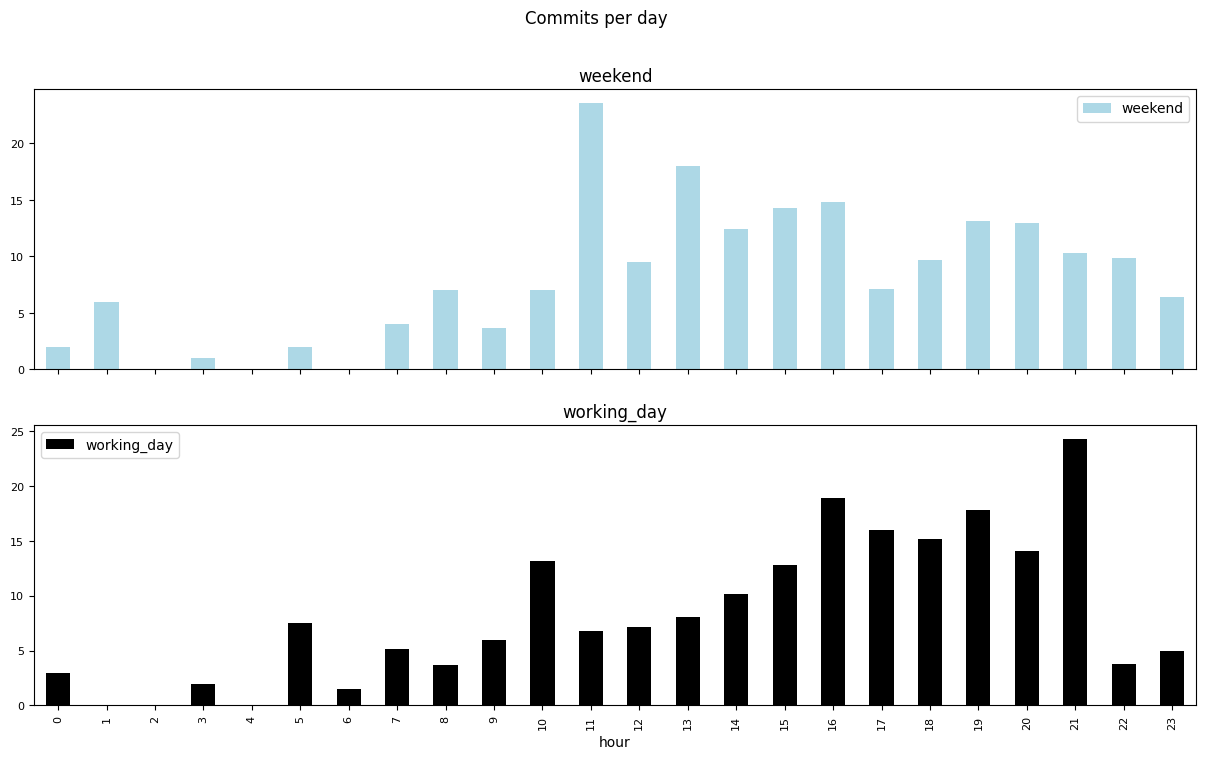

In [3]:
df = df[["weekend", "working_day"]]
df.plot.bar(fontsize=8, figsize=(15,8), title="Commits per day", color=["lightblue", "black"], subplots=True)

* at the end of your Jupyter Notebook, create a markdown cell and insert the question
  * “Is the dynamic different on working days and weekends?”, for the answer
include the hour when the number of commits is the largest during working days and the hour when it is the largest during the weekend.

In [4]:
df[df["working_day"] == df["working_day"].max()]

,weekend,working_day
hour,,
21,10.285714,24.333333


In [5]:
df[df["weekend"] == df["weekend"].max()]

,weekend,working_day
hour,,
11,23.6,6.769231


In [6]:
answer = f"""Yes, the commit dynamics are different on working days and weekends.\n
- On working days, the largest number of commits occurs at {df["working_day"].idxmax()} o'clock.
- On weekends, the largest number of commits occurs at {df["weekend"].idxmax()} o'clock."""
print(answer)

Yes, the commit dynamics are different on working days and weekends.

- On working days, the largest number of commits occurs at 21 o'clock.
- On weekends, the largest number of commits occurs at 11 o'clock.


In [7]:
connection.close()